# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "HIV-Verlauf in Europa den letzten 35 Jahren"
### 1.2 Fragestellung:
1. Wo in Europa waren die meisten Menschen betroffen und warum? 
2. Ab wann konnten die Ansteckungen reduziert werden und wie?
### 1.3 Datenquelle(n):
Beispiele für mögliche Datenquellen:
- https://ourworldindata.org
- https://healthdata.gov/
- https://www.who.int/data/collections
- https://www.kaggle.com/datasets?tags=4202-Healthcare




### 1.4 Daten beschaffen und laden

In [8]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben
!pip install pandas
!pip install seaborn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.1 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 26.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------------------------------------- -- 6.6/7.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 28.4 MB/s eta 0:00:00

   ---------------------------------------- 0/8 [pyparsing]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   ----- ---------------------------------- 1/8 [pillow]
   --

In [8]:
import pandas as pd

df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

europe = [
    "Austria","Belgium","France","Germany","Liechtenstein","Luxembourg","Monaco",
    "Netherlands","Switzerland","Albania","Andorra","Bosnia and Herzegovina",
    "Croatia","Greece","Italy","Malta","Montenegro","North Macedonia","Portugal",
    "San Marino","Serbia","Slovenia","Spain","Vatican","Denmark","Estonia","Finland",
    "Iceland","Ireland","Latvia","Lithuania","Norway","Sweden","United Kingdom",
    "Belarus","Bulgaria","Czechia","Hungary","Moldova","Poland","Romania",
    "Russia","Slovakia","Ukraine"
]

df = df[df["Entity"].isin(europe)]

max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

df



,Entity,Code,Year,HIV prevalence - Sex: total - Age: 15-49 - Central estimate
34,Albania,ALB,1990,0.00064
35,Albania,ALB,1991,0.00070
36,Albania,ALB,1992,0.00090
37,Albania,ALB,1993,0.00123
38,Albania,ALB,1994,0.00175
...,...,...,...,...
5572,Ukraine,UKR,2017,0.96346
5573,Ukraine,UKR,2018,0.96401
5574,Ukraine,UKR,2019,0.96433
5575,Ukraine,UKR,2020,0.96143


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

Pivot-Tabelle ausgewählter Länder:


Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Denmark,0.07244,0.08113,0.08874,0.09479,0.09922,0.10214,0.10378,0.10856,0.11429,0.11916,...,0.11194,0.10886,0.10562,0.10196,0.09781,0.09322,0.08826,0.08310,0.08235,0.08020
France,0.17639,0.17899,0.17892,0.17718,0.17447,0.17149,0.16923,0.17378,0.18451,0.19747,...,0.34583,0.34745,0.34873,0.34953,0.34975,0.34931,0.34827,0.34591,0.34392,0.34181
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.12344,0.12624,0.12861,0.13044,0.13183,0.13352,0.13440,0.13530,NaN,NaN
Greece,0.01588,0.02003,0.02438,0.02876,0.03302,0.03813,0.04332,0.04820,0.05262,0.05654,...,0.14103,0.14989,0.15837,0.16626,0.17340,0.17951,0.18435,0.18787,0.19012,0.19065
Italy,0.13751,0.15349,0.16685,0.17757,0.18587,0.19202,0.19763,0.20481,0.21322,0.22165,...,0.26809,0.26426,0.25986,0.25440,0.24786,0.23992,0.23116,0.22222,0.21279,0.20305
Netherlands,0.08215,0.08191,0.08149,0.08126,0.08137,0.08166,0.08533,0.09176,0.09899,0.10662,...,0.18700,0.18519,0.18256,0.17973,0.17602,0.17153,0.16618,0.16006,0.15837,NaN
Portugal,0.21919,0.27977,0.33801,0.38870,0.42977,0.46154,0.48504,0.50539,0.52522,0.54217,...,0.62632,0.61825,0.60906,0.59751,0.58397,0.56830,0.54999,0.52828,0.50637,0.48331
Spain,0.29223,0.33390,0.36678,0.38783,0.39783,0.39869,0.39795,0.39805,0.39697,0.39421,...,0.28971,0.28402,0.27865,0.27297,0.26567,0.25738,0.25095,0.24325,0.23719,0.23010
Switzerland,0.16040,0.17445,0.18550,0.19367,0.19845,0.19951,0.20264,0.20750,0.21180,0.21527,...,0.22879,0.22529,0.22115,0.21639,0.21096,0.20471,0.19765,0.19122,0.18326,0.17470


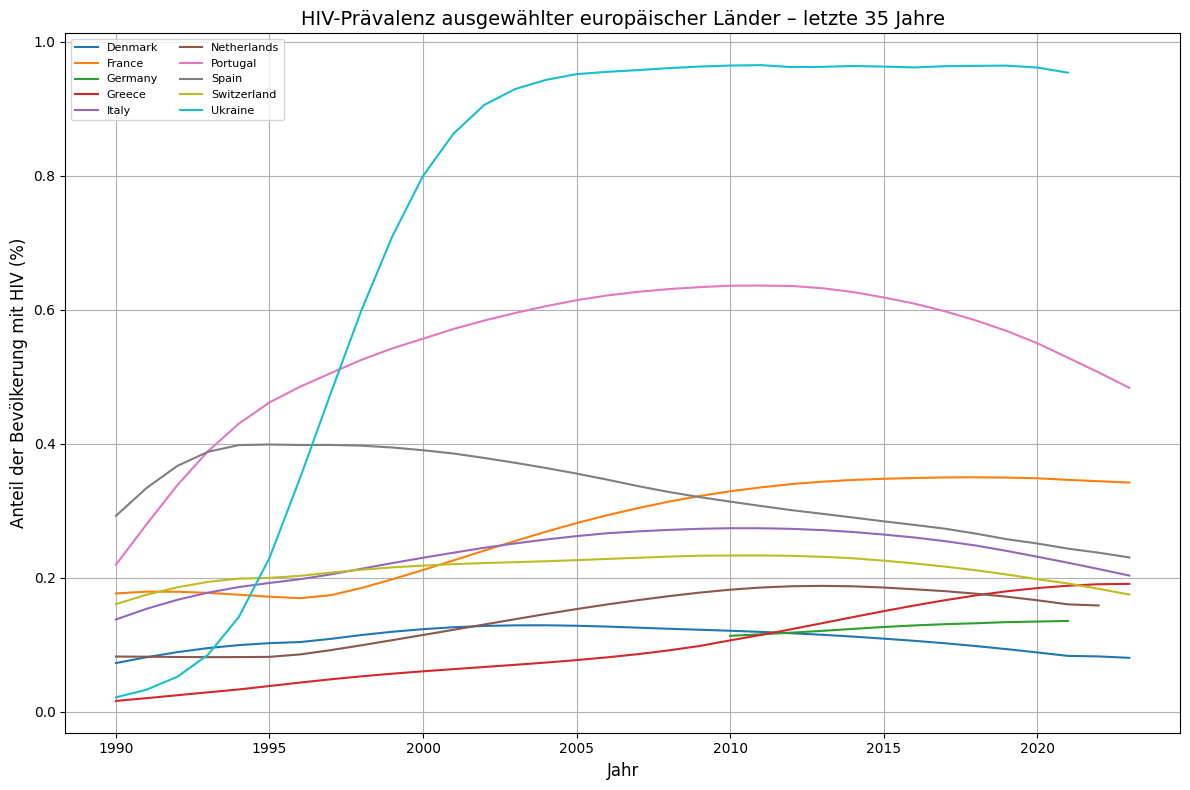

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("https://ourworldindata.org/grapher/share-of-the-population-infected-with-hiv.csv")

# Ausgewählte europäische Länder
selected_countries = [
    "Switzerland", "Germany", "Spain", "Portugal", "France", "Italy",
    "United Kingdom", "Netherlands", "Belgium", "Poland", "Sweden",
    "Finland", "Norway", "Denmark", "Russia", "Ukraine", "Greece"
]

# Filter auf ausgewählte Länder
df = df[df["Entity"].isin(selected_countries)]

# Filter auf letzte 35 Jahre
max_year = df["Year"].max()
df = df[df["Year"] >= max_year - 35]

# Dynamisch die Spalte für die HIV-Werte finden
hiv_col = [col for col in df.columns if "hiv" in col.lower()]
if len(hiv_col) != 1:
    raise ValueError(f"Kann die HIV-Spalte nicht eindeutig bestimmen, gefunden: {hiv_col}")
hiv_col = hiv_col[0]

# Pivot-Tabelle erstellen: Länder als Zeilen, Jahre als Spalten
pivot_df = df.pivot(index="Entity", columns="Year", values=hiv_col)

# Pivot-Tabelle anzeigen
print("Pivot-Tabelle ausgewählter Länder:")
display(pivot_df)  # in Jupyter Notebook schön formatieren

# Diagramm erstellen
plt.figure(figsize=(12,8))
for country in pivot_df.index:
    plt.plot(pivot_df.columns, pivot_df.loc[country], label=country)

plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Anteil der Bevölkerung mit HIV (%)", fontsize=12)
plt.title("HIV-Prävalenz ausgewählter europäischer Länder – letzte 35 Jahre", fontsize=14)
plt.legend(fontsize=8, ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

